In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score

In [2]:
df = pd.read_csv("drug_consumption.csv", 
                  names=["Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"])

In [3]:
arr = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

# remove CL and convert strings to ints
# CL0   - Never used  : 0
# CL3-6 - Have used   : 1
for i in range(len(arr)):
    df[arr[i]].replace({"CL0": "0", "CL1": "1", "CL2": "1", "CL3": "1", "CL4": "1", "CL5": "1", "CL6": "1"}, inplace=True)
    df[arr[i]] = pd.to_numeric(df[arr[i]])

In [4]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,1,0,1,1,0,1,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,1,1,0,0,0,0,1
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,1,0,0,1,1,1,1,1,0,0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,1,0,1,0,1,0,1,1,0,0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,1,0,0,1,1,0,1,1,0,0


### GRID SEARCH:

In [5]:
X = df[["Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]]
selected_substances = ['Alcohol', 'Amphet', 'Cannabis', 'Coke', 'Ecstasy', 'LSD', 'Meth', 'Mushrooms']

In [6]:
from sklearn.model_selection import GridSearchCV

max_iterations = [800, 1000, 1300]
hidden_layer_size = [(a,b) for a in 5 * np.arange(1, 5) for b in 5 * np.arange(1, int(a/5))]
learning_rates = 0.1 * np.arange(1,4)
param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_size, max_iter = max_iterations)

model_params = []

for substance in selected_substances:
    y = df[substance]    
    
    mlp = MLPClassifier(solver = 'sgd', 
                    random_state = 1, 
                    activation = 'logistic')
    grid = GridSearchCV(estimator = mlp, param_grid = param_grid, n_jobs=-1, cv=3)
    grid.fit(X, y)
    model_params.append(grid.best_params_)
    print(substance + ': ')
    print('Optimal Hyper-parameters: ', grid.best_params_)
    print('Optimal Accuracy: ', grid.best_score_, '\n')

Alcohol: 
Optimal Hyper-parameters:  {'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.1, 'max_iter': 800}
Optimal Accuracy:  0.9819634171451331 

Amphet: 
Optimal Hyper-parameters:  {'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.1, 'max_iter': 800}
Optimal Accuracy:  0.6387510590395565 

Cannabis: 
Optimal Hyper-parameters:  {'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.1, 'max_iter': 800}
Optimal Accuracy:  0.7761806392379641 

Coke: 
Optimal Hyper-parameters:  {'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.1, 'max_iter': 800}
Optimal Accuracy:  0.6620684941216975 



/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Ecstasy: 
Optimal Hyper-parameters:  {'hidden_layer_sizes': (20, 15), 'learning_rate_init': 0.1, 'max_iter': 800}
Optimal Accuracy:  0.6673755058918042 

LSD: 
Optimal Hyper-parameters:  {'hidden_layer_sizes': (20, 10), 'learning_rate_init': 0.1, 'max_iter': 800}
Optimal Accuracy:  0.7199123064615759 

Meth: 
Optimal Hyper-parameters:  {'hidden_layer_sizes': (20, 5), 'learning_rate_init': 0.1, 'max_iter': 800}
Optimal Accuracy:  0.7633827157993514 

Mushrooms: 
Optimal Hyper-parameters:  {'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.1, 'max_iter': 800}
Optimal Accuracy:  0.699754269068619 



### Generate Models From Optimal Parameters

In [7]:
conf_matrices = []  # List of of confusion matrices, one for each substance
models = []

for substance, params in zip(selected_substances, model_params):
    print(params)
    y = df[substance]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    
    mlp = MLPClassifier(solver = 'sgd', 
                    random_state = 1, 
                    activation = 'logistic', 
                    learning_rate_init = params['learning_rate_init'], 
                    hidden_layer_sizes = params['hidden_layer_sizes'], 
                    max_iter = params['max_iter'])
    
    mlp.fit(X_train, y_train)
    models.append(mlp)
    y_pred = mlp.predict(X_test)
    
    print("--", substance, "--")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Mean Square Error:", mean_squared_error(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='micro'))
    print("Recall:", recall_score(y_test, y_pred, average='micro'))
    conf_matrices.append(confusion_matrix(y_test, y_pred))

{'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.1, 'max_iter': 800}
-- Alcohol --
Accuracy: 0.9470899470899471
Mean Square Error: 0.05291005291005291
Precision: 0.9470899470899471
Recall: 0.9470899470899471
{'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.1, 'max_iter': 800}
-- Amphet --
Accuracy: 0.6931216931216931
Mean Square Error: 0.30687830687830686
Precision: 0.6931216931216931
Recall: 0.6931216931216931
{'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.1, 'max_iter': 800}


/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


-- Cannabis --
Accuracy: 0.7883597883597884
Mean Square Error: 0.21164021164021163
Precision: 0.7883597883597884
Recall: 0.7883597883597884
{'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.1, 'max_iter': 800}
-- Coke --
Accuracy: 0.6666666666666666
Mean Square Error: 0.3333333333333333
Precision: 0.6666666666666666
Recall: 0.6666666666666666
{'hidden_layer_sizes': (20, 15), 'learning_rate_init': 0.1, 'max_iter': 800}
-- Ecstasy --
Accuracy: 0.6507936507936508
Mean Square Error: 0.3492063492063492
Precision: 0.6507936507936508
Recall: 0.6507936507936508
{'hidden_layer_sizes': (20, 10), 'learning_rate_init': 0.1, 'max_iter': 800}
-- LSD --
Accuracy: 0.7301587301587301
Mean Square Error: 0.2698412698412698
Precision: 0.7301587301587301
Recall: 0.7301587301587301
{'hidden_layer_sizes': (20, 5), 'learning_rate_init': 0.1, 'max_iter': 800}
-- Meth --
Accuracy: 0.8148148148148148
Mean Square Error: 0.18518518518518517
Precision: 0.8148148148148148
Recall: 0.8148148148148148
{'hidden_la

### Generate Confusion Matrices

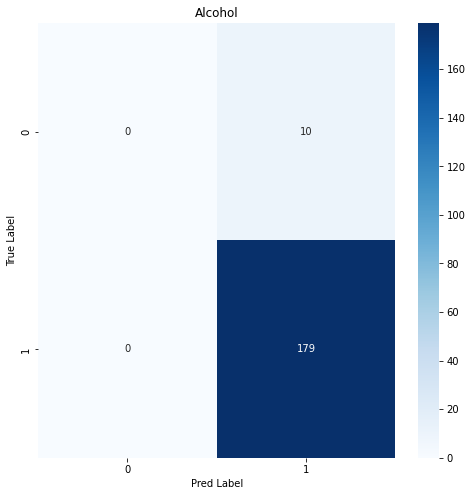

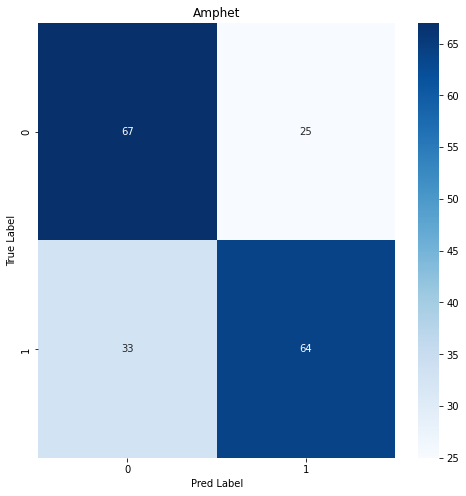

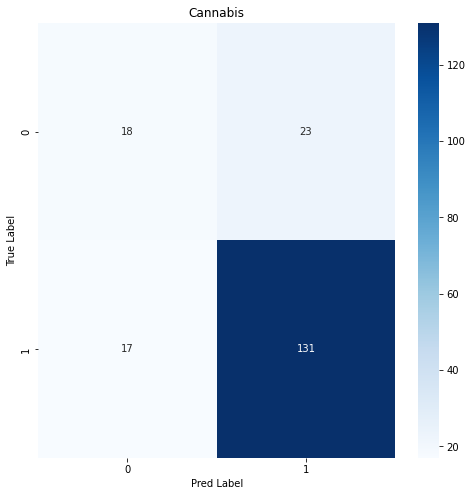

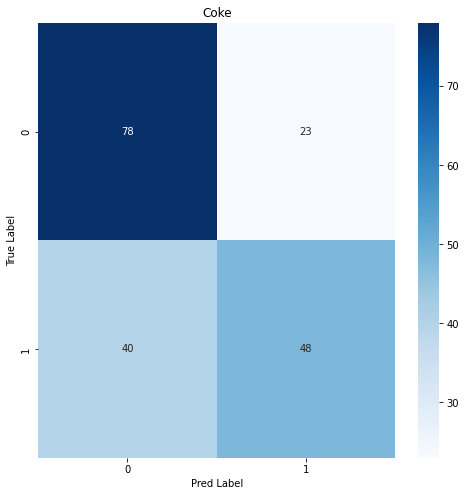

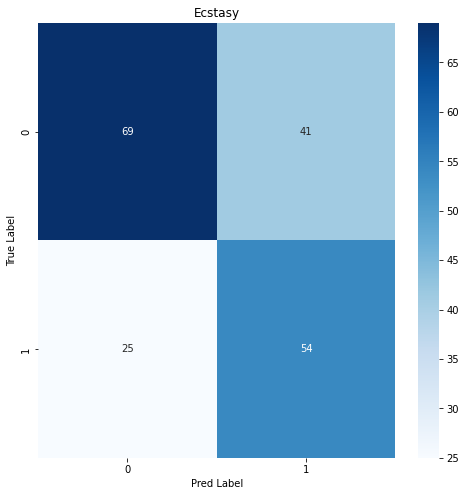

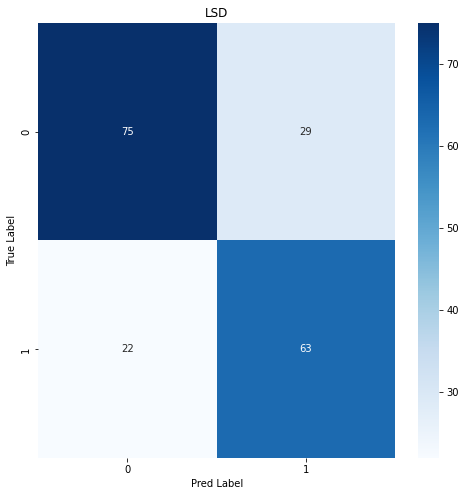

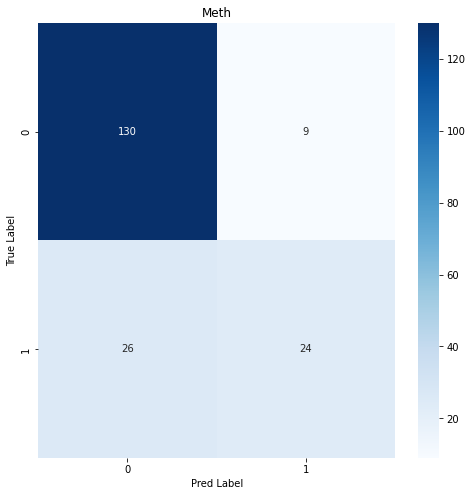

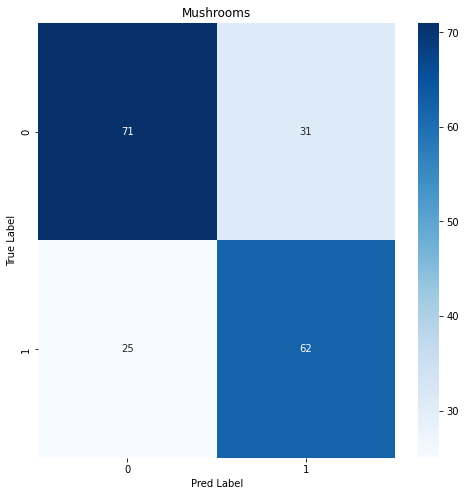

/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/

/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_networ

/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bl/.local/lib/python3.8/site-packages/sklearn/neural_network/

In [8]:
for i, m in enumerate(conf_matrices):
    fig, ax = plt.subplots(figsize=(8,8))
    fig = sns.heatmap(m, annot=True, cmap="Blues", fmt='g', ax=ax)
    fig.set_title(selected_substances[i])
    fig.set_ylabel("True Label")
    fig.set_yticklabels(["0", "1"])
    fig.set_xlabel("Pred Label")
    fig.set_xticklabels(["0", "1"])